Minimal Contact Binary System
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.1 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.1,<2.2"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

Here we'll initialize a default binary, but ask for it to be created as a contact system.

In [3]:
b_cb = phoebe.default_binary(contact_binary=True)

We'll compare this to the default detached binary

In [4]:
b_detached = phoebe.default_binary()

Hierarchy
-------------

Let's first look at the hierarchy of the default detached binary, and then compare that to the hierarchy of the overcontact system

In [5]:
print b_detached.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary
    



In [6]:
print b_cb.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary 
        envelope:contact_envelope
    



As you can see, the overcontact system has an additional "component" with method "envelope" and component label "contact_envelope".

Next let's look at the parameters in the envelope and star components. You can see that most of parameters in the envelope class are constrained, while the equivalent radius of the primary is unconstrained. The value of primary equivalent radius constrains the potential and fillout factor of the envelope, as well as the equivalent radius of the secondary.

In [7]:
print b_cb.filter(component='contact_envelope', kind='envelope', context='component')

ParameterSet: 5 parameters
  abun@contact_envelope@compo...: 0.0
* fillout_factor@contact_enve...: 0.641789708077
* pot@contact_envelope@component: 3.40137740723
* pot_min@contact_envelope@co...: 3.20679622409
* pot_max@contact_envelope@co...: 3.75


In [8]:
print b_cb.filter(component='primary', kind='star', context='component')

ParameterSet: 18 parameters
        requiv@primary@component: 1.5 solRad
*   requiv_max@primary@component: 1.67245639728 solRad
*   requiv_min@primary@component: 1.27254185687 solRad
          teff@primary@component: 6000.0 K
       syncpar@primary@component: 1.0
*       period@primary@component: 0.5 d
*         freq@primary@component: 12.56637 rad / d
         pitch@primary@component: 0.0 deg
           yaw@primary@component: 0.0 deg
          incl@primary@component: 90.0 deg
       long_an@primary@component: 0.0 deg
     gravb_bol@primary@component: 0.32
  irrad_frac_refl_bol@primary...: 0.6
* irrad_frac_lost_bol@primary...: 0.4
   ld_func_bol@primary@component: logarithmic
  ld_coeffs_bol@primary@compo...: [0.5 0.5]
*         mass@primary@component: 1.00890679945 solMass
*          sma@primary@component: 1.675 solRad


In [9]:
b_cb['requiv@primary'] = 1.5

In [10]:
b_cb['pot@contact_envelope@component']

<Parameter: pot=3.40137740723 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

In [11]:
b_cb['fillout_factor@contact_envelope@component']

<Parameter: fillout_factor=0.641789708077 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

In [12]:
b_cb['requiv@secondary@component']

<Parameter: requiv=1.5 solRad | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

Now, of course, if we didn't originally know we wanted a contact binary and built the default detached system, we could still turn it into an contact binary just by changing the hierarchy.

In [13]:
b_detached.add_component('envelope', component='contact_envelope')

<ParameterSet: 5 parameters | qualifiers: abun, pot_max, pot, fillout_factor, pot_min>

In [14]:
hier = phoebe.hierarchy.binaryorbit(b_detached['binary'], b_detached['primary'], b_detached['secondary'], b_detached['contact_envelope'])
print hier

orbit:binary(star:primary, star:secondary, envelope:contact_envelope)


In [15]:
b_detached.set_hierarchy(hier)

Fri, 26 Oct 2018 11:41 PARAMETERS   WARNING secondary is overflowing at L2/L3 (requiv=nan, requiv_max=2.01327517654)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 26 Oct 2018 11:41 PARAMETERS   WARNING secondary is overflowing at L2/L3 (requiv=nan, requiv_max=2.01327517654)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 26 Oct 2018 11:41 PARAMETERS   WARNING secondary is overflowing at L2/L3 (requiv=nan, requiv_max=2.01327517654)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 26 Oct 2018 11:41 PARAMETERS   WARNING secondary is overflowing at L2/L3 (requiv=nan, requiv_max=2.01327517654)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 26 Oct 2018 11:41 PARAMETERS   WARNING secondary is overflowing at L2/L3 (requiv=nan, requiv_max=2.01327517654)  If not addressed, 

In [16]:
print b_detached.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary 
        envelope:contact_envelope
    



However, since our system was detached, the system is not overflowing, and therefore doesn't pass system checks

In [17]:
b_detached.run_checks()

(False,
 'primary is underflowing at L1 and not a contact system (requiv=1.0, requiv_min=2.01327517654)')

And because of this, the potential and requiv@secondary constraints cannot be computed

In [18]:
b_detached['pot@component']

<Parameter: pot=nan | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

In [19]:
b_detached['requiv@secondary@component']

<Parameter: requiv=nan solRad | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

Likewise, we can make a contact system detached again simply by removing the envelope from the hierarchy.  The parameters themselves will still exist (unless you remove them), so you can always just change the hierarchy again to change back to an overcontact system.

In [20]:
hier = phoebe.hierarchy.binaryorbit(b_detached['binary'], b_detached['primary'], b_detached['secondary'])
print hier

orbit:binary(star:primary, star:secondary)


In [21]:
b_detached.set_hierarchy(hier)

In [22]:
print b_detached.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary
    



Although the constraints have been removed, PHOEBE has lost the original value of the secondary radius (because of the failed contact constraints), so we'll have to reset that here as well.

In [23]:
b_detached['requiv@secondary'] = 1.0

Adding Datasets
---------------------

In [24]:
b_cb.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [25]:
b_cb.add_dataset('orb', times=np.linspace(0,1,201), dataset='orb01')

<ParameterSet: 3 parameters | contexts: compute, dataset>

In [26]:
b_cb.add_dataset('lc', times=np.linspace(0,1,21), dataset='lc01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [27]:
b_cb.add_dataset('rv', times=np.linspace(0,1,21), dataset='rv01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

For comparison, we'll do the same to our detached system

In [28]:
b_detached.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [29]:
b_detached.add_dataset('orb', times=np.linspace(0,1,201), dataset='orb01')

<ParameterSet: 3 parameters | contexts: compute, dataset>

In [30]:
b_detached.add_dataset('lc', times=np.linspace(0,1,21), dataset='lc01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [31]:
b_detached.add_dataset('rv', times=np.linspace(0,1,21), dataset='rv01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

Running Compute
--------------------

In [32]:
b_cb.run_compute(irrad_method='none')

<ParameterSet: 26 parameters | kinds: rv, mesh, orb, lc>

In [33]:
b_detached.run_compute(irrad_method='none')

<ParameterSet: 26 parameters | kinds: rv, mesh, orb, lc>

Synthetics
------------------

To ensure compatibility with computing synthetics in detached and semi-detached systems in Phoebe, the synthetic meshes for our overcontact system are attached to each component separetely, instead of the contact envelope.

In [34]:
print b_cb['mesh01@model'].components

['primary', 'secondary']


In [35]:
print b_detached['mesh01@model'].components

['primary', 'secondary']


Plotting
---------------

### Meshes

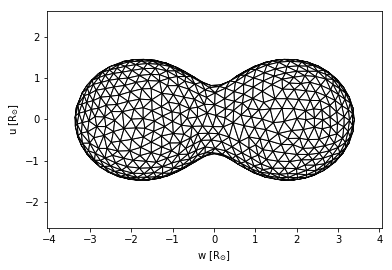

In [36]:
afig, mplfig = b_cb['mesh01@model'].plot(x='ws', show=True)

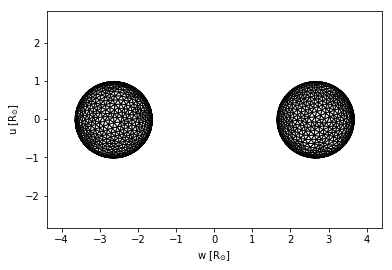

In [37]:
afig, mplfig = b_detached['mesh01@model'].plot(x='ws', show=True)

### Orbits

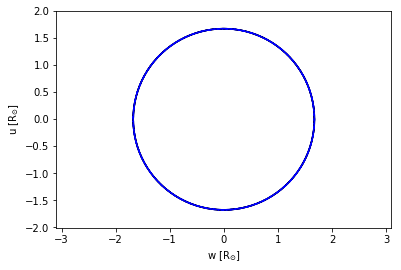

In [38]:
afig, mplfig = b_cb['orb01@model'].plot(x='ws',show=True)

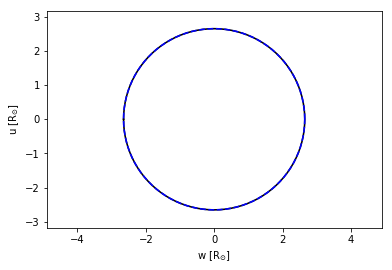

In [39]:
afig, mplfig = b_detached['orb01@model'].plot(x='ws',show=True)

### Light Curves

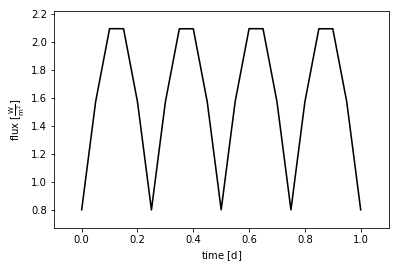

In [40]:
afig, mplfig = b_cb['lc01@model'].plot(show=True)

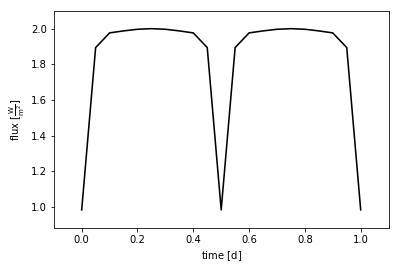

In [41]:
afig, mplfig = b_detached['lc01@model'].plot(show=True)

### RVs

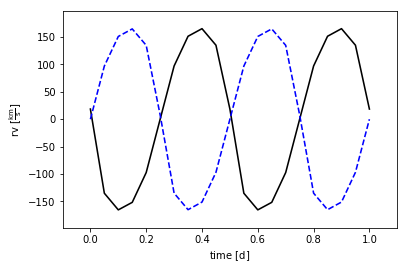

In [42]:
afig, mplfig = b_cb['rv01@model'].plot(show=True)

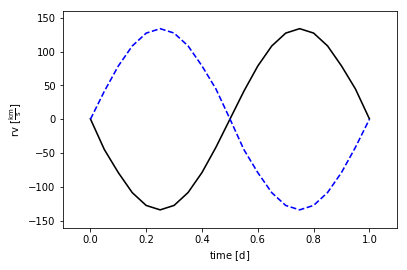

In [43]:
afig, mplfig = b_detached['rv01@model'].plot(show=True)